# Numerical Ordinary Differential Equations and Applications
## Computer Project Assignment 2: Projectile

D. J. Higham and H. Yorston, 
School of Mathematics, University of Edinburgh, 2021

In this second computer project assignment we will investigate the trajectory of a projectile. This is a template Jupyter notebook that (i) gets you started and (ii) sets the two tasks that make up the assignment.
In order to complete the assigment, you must perform the two tasks by editing and/or adding further content to this notebook.
Any figure that you produce should have labeled axes, a title, and where appropriate, a legend to distinguish between plots.
To submit your completed work (a) create a pdf version of the notebook when all cells have been run (on a Mac/Safari system this may be done via "File", "Print Preview" and "Export as PDF"), (b) submit both the .ipynb and .pdf versions" electronically on Learn. Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. If there is any inconsistency between the two files, we will regard the .ipynb version as your definitive submission. Make sure that your name is clearly indicated at the top of notebook.
The deadline is **midday on Monday 8th February** and, as for all continuous assessment in this course, standard University of Edinburgh penalties apply for late submissions.

## Motivation

In this project we consider the setting where a large, passive, object is projected at high speed from a very powerful launching mechanism. For example, a cannon or gun may fire a heavy weapon at a distant enemy, or an aid agency may distribute supplies to an inaccesible region. 

## Equations of motion

Our model will, of course, be based on many simplifying assumptions.
In particular, we suppose that the projectile stays in a vertical plane, so that its position may be described by two coordinates: $x(t)$ is the horizontal distance travelled, and $y(t)$ is the vertical height, at time $t$.
The earth's surface is assumed to be flat over the relevant scale. 
The initial position of the projectile is $x(0) = 0$ and $y(0) = 0$, where a height of zero is ground level.

Because the projectile is large, we will ignore the effect of wind. We therefore assume that the projectile is subject to two
types of force: gravity and drag. (The resulting ODE will be more complicated than the standard gravity-only model that you may have encountered before.)

By applying Newton's second law, we arrive at equations for 
$\ddot{x}$ and $\ddot{y}$, the second derivatives of $x(t)$ and $y(t)$ with respect to time.
These may be converted to a system of four first order equations involving $\dot{x}$, $\dot{y}$, $\ddot{x}$ and $\ddot{y}$.
For simplicity, we will write $u = \dot{x}$ and $v = \dot{y}$.
Our ODE system may then be written
\begin{equation}
\begin{aligned}
\dot{x} &= u, \\
\dot{y} &= v, \\
\dot{u} &= -\frac{B}{m}\Big[ 1 - \frac{ay}{T_0} \Big]^\alpha u\Big[ u^2+v^2 \Big]^{1/2},\\
\dot{v} &= -\frac{B}{m}\Big[ 1 - \frac{ay}{T_0} \Big]^\alpha v\Big[ u^2+v^2 \Big]^{1/2}-g.\\
\end{aligned}
\label{ODEs}
\end{equation}

In specifying the parameters in the ODE system, we are working with **distance measured in metres**, **time measured in seconds**, **mass measured in kilograms** and **temperature measured in degrees Kelvin**.

Here, $m$ is the mass of the projectile and
$T_0$ is the air temperature at sea level.


We will take $m = 50$ and 
$T_0 = 288$.
The value $g = 9.81$ is the force of gravity per kilogram, assumed constant.

The constant parameters 
$a$ and $\alpha$ arise from an approximation to the way that air density depends on altitude.
We will take 
$a= 6.5 \cdot 10^{-3}$ and $\alpha = 2.5$.

If $1 - ay/T_0 < 0$, then we have an issue in taking the fractional power of a negative number.
In this case, the altitude is so high that air density is effectively zero, and we may 
use $\dot{u} = 0$ and $\dot{v} = -g$.



The constant parameter $B$ relates to a property of the launch mechanism. We will take
$B = 2 \cdot 10^{-3}$.

We assume that the projectile is launched at an angle $\theta$ degrees from the ground.
We are expressing the **launch angle in degrees** rather than radians
on the basis that we will be reporting our results to non-mathematicians.
But we note that Python's $\sin$ and $\cos$ functions accept arguments in terms of radians.  

Taking the initial speed of the projectile to be $S_0 = 1640$ metres per second, our initial conditions are 
$x(0) = 0$, $y(0) = 0$,
$u(0) = S_0 \cos(\theta)$ and 
$v(0) = S_0 \sin(\theta)$.  


## Initial Simulation

The code below simulates the path of the projectile for launch angle $\theta = 40$ degrees over the time interval $0 \le t \le T$, where $T = 100$ seconds. We use Euler's method with a stepsize $h = 0.01$. 

We plot the trajectory in the $x$-$y$ plane, with the axes labeled in units of kilometres.

In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

# Model parameters

g = 9.81             # Gravitational constant
alpha = 2.5          # Parameter in air density model
a = 6.5 * 10 ** (-3) # Parameter in air density model
T_0 = 288            # Sea level temperature
m = 50               # Projectile mass
B = 2 * 10 ** (-3)   # Constant characterising the launch mechanism
S_0 = 1640           # Initial speed


def f(w):
    """ This function describes the RHS of the ODE system
    Parameter:
        w       vector of length 4 containing the x, y coordinates and their velocities 
    """
    
    temp_vector = np.zeros(4)
    temp_vector[0] = w[2]
    temp_vector[1] = w[3]
    # Precompute k and s for convenience
    k = (1 - a * w[1] / T_0)   # Air density factor
    s = np.sqrt( w[2] ** 2 + w[3] ** 2 )
    if k>0:
        temp_vector[2] = - (B / m) * (k ** (alpha)) * w[2] * s
        temp_vector[3] = - (B / m) * (k ** (alpha)) * w[3] * s - g
    else: # if air density gets too small, set it to zero
        temp_vector[2] = 0 
        temp_vector[3] = - g
    return temp_vector 

def euler_step(f ,w ,h):
    """One step of Euler's method
     Parameters:
        f      RHS of ODE system
        w      numerical approximation of w at time t
        h      stepsize
    Returns:
        numerical approximation of w at time t+h
    """
    return w + h * f(w)

In [2]:
def shoot(theta, S_0):
    """ Initializes the vector w (position and velocity coords of the
    projectile) given initial launch angle, theta, in degrees, and 
    initial speed S_0. 
    """
    w = np.zeros(4)
    w[2] = S_0 * np.cos(np.deg2rad(theta))
    w[3] = S_0 * np.sin(np.deg2rad(theta))
    return w


def projectile_motion_time(h, theta, T):
    """ Calculates the trajectory of the projectile up to time T using Euler.
    Parameters:
        h        stepsize
        theta    initial launch angle in degrees
    Returns:
        X_list   array of x positions
        Y_list   array of y positions
    """
    w = shoot(theta, S_0)
    X_list = np.zeros(0)
    Y_list = np.zeros(0)
    t = 0
    while  t < T:
        w = euler_step(f, w, h)
        t = t + h
        X_list = np.append(X_list, w[0])
        Y_list = np.append(Y_list, w[1])
    return X_list, Y_list

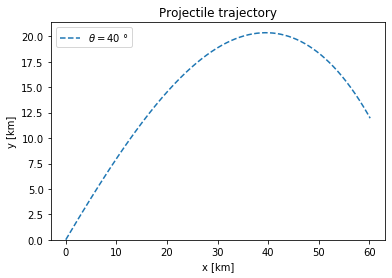

In [236]:
plt.figure()
plt.title("Projectile trajectory")
plt.xlabel(r"x [km]")
plt.ylabel(r"y [km]")
T = 100
angle = 40
h = 0.01
x_list, y_list = projectile_motion_time(h, angle, T)
plt.plot(x_list/1000, y_list/1000, '--', label=r'$\theta = $%.i $\degree$'%(angle))
plt.legend(loc='best')
plt.gca().set_ylim(bottom=0)
plt.show()

## Task 1
[Total of 7 marks]

In most applications, we wish to know where the projectile will land. 
We will let $x_{\text{range}}$ denote the horizontal distance $x$ that has been traversed when the projectile returns 
to the ground. That is, $x_{\text{range}} = x(t^\star)$, where $t^\star > 0$ is the first positive time at which 
$y(t^\star) = 0$.


For a given launch angle we may compute an approximation to 
 $x_{\text{range}}$ by (i) stepping forwards in time until the numerical solution first gives a negative $y$ value, say $y(t_n) < 0$, and then (ii) computing $ x_{\text{range}} $ by linearly interpolating between 
 $(x_{n-1},y_{n-1})$  and
 $(x_{n},y_{n})$. (In other words, consider the straight line joining 
  $(x_{n-1},y_{n-1})$  and
 $(x_{n},y_{n})$, and take the $x$ value that gives a $y$ value of zero.) 
 
 For this task use Euler with stepsize $h = 0.1$.

 
 **Task 1a** [4 marks] By testing all integer launch angles $\theta = 1,2,3,...,89$ degrees create a plot with $x = x_{\text{range}}$ on the vertical axis against $\theta$ on the horizontal axis.
  
 **Task 1b** [1 mark] Following on from Task 1a, by testing all integer launch angles $\theta = 1,2,3,...,89$ degrees, find and report the integer launch angle, $\theta^\star$, (in degrees) that gives the largest value of $x_{\text{range}}$. As a sanity check, report $x_{\text{range}}$ for $\theta^\star-1$, $\theta^\star$  and $\theta^\star +1$ degrees.
 
 **Task 1c** [2 marks] On a single figure, plot the trajectory in the $x$-$y$ plane, up to distance $x = x_{\text{range}}$, for the launch angles $\theta = 30$, $35$, $40$, $45$, $50$, $55$, $60$, $65$ and $70$ degrees.


In [41]:
import scipy
from scipy import interpolate 
from scipy import optimize

In [150]:
# Find x and y coordinates of the points where y goes from positive axis to negative

def x_range(h, theta):
    """ Calculates the trajectory of the projectile up to the point where y > 0 using Euler.
    Parameters:
        h        stepsize
        theta    initial launch angle in degrees
    Returns:
        x_roots   array of x positions
        y_roots   array of y positions
    """
    
    T = 250
    x_roots = np.zeros(2)
    y_roots = np.zeros(2)
    x_list, y_list = projectile_motion_time(h, theta, T)
    
    for i in range(len(y_list)):
        if y_list[i] < 0:    
            x_roots[0],x_roots[1] = x_list[i],x_list[i-1]
            y_roots[0],y_roots[1] = y_list[i],y_list[i-1]
            return x_roots, y_roots

In [151]:
def interpolate(x_points, y_points):
    """ Interpolates to find a solution between 2 points
    Parameters:
        x_points    x-coordinates of points to interpolate
        y_points    y-coordinates of points to interpolate
    Returns:
        x_root    x-coordinate of the root 
    """
    
    # create straight line y=mx+c
    gradient  = (y_points[1]-y_points[0])/(x_points[1] - x_points[0])
    y_int = y_points[0] - gradient * x_points[0]
    
    #at y=0 x=-c/m
    x_root = -y_int/gradient
    
    return x_root

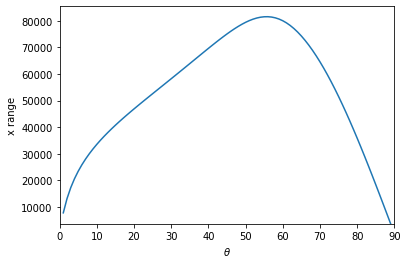

In [158]:
#Task 1a : test all integer launch angles and plot x range against theta

def loop_angles():
    """ Calculates the range of the projectile for a range of angles
    
    Returns:
        Plot of x-range against angle θ
    """
    h = 0.1
    range_values = []
    angles = np.arange(1,90)
    
    for i in range(len(angles)):
        x_points, y_points = x_range(h, angles[i])
        range_val = interpolate(x_points, y_points)
        range_values.append(range_val)
    return range_values

range_values = loop_angles()
plt.plot(angles, range_values)
plt.xlabel(r'$\theta $')
plt.ylabel('x range')
plt.ylim(min(range_values))
plt.xlim([0,90])
plt.show()

In [305]:
'''
Task 1b : find and report laungh angle that gives largest range and perform sanity check 
with previous and next angle
'''

theta_star = np.int(angles[np.where(range_values == max(range_values))])
print('Maximum range (in km) = ' + str(max(range_values)/1000))
print('θ* (in degrees) = ' + str(theta_star))

#Perform sanity check
print('At θ* + 1 range (in km) = '+ str(np.float(range_values[np.int((np.where(angles == np.int(theta_star+1)))[0])])/1000))
print('At θ* - 1 range (in km) = '+ str(np.float(range_values[np.int((np.where(angles == np.int(theta_star-1)))[0])])/1000))

Maximum range (in km) = 81.53693256700173
θ* (in degrees) = 56
At θ* + 1 range (in km) = 81.4052077309633
At θ* - 1 range (in km) = 81.51437747246551


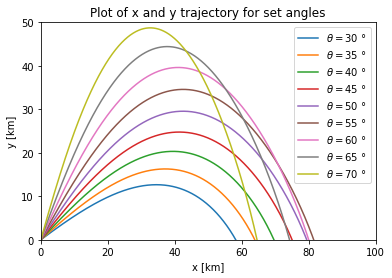

In [207]:
'''
Task 1c : Plot the trajectory of the projectile in the xy plane for the given angles
'''

new_angles = np.arange(30,75,5)

for i in range(len(new_angles)):
    T = 250
    new_x, new_y = projectile_motion_time(0.1, new_angles[i], T)
    
    plt.plot(new_x/1000, new_y/1000, label=r'$\theta = $%.i $\degree$'%(new_angles[i]))
    plt.legend(loc='best')
    plt.xlim([0,100])
    plt.ylim([0,50])
    plt.title('Plot of x and y trajectory for set angles')
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
plt.show()

## Task 2
[Total of 8 marks]

Consider the 4th order, 4 stage, explicit Runge-Kutta method with Butcher tableau 
$$
\begin{array}{ c|c c c }
     0   &     &     &     &    \\
    1/2 & 1/2 &     &     &    \\
     1/2 & 0   & 1/2 &     &    \\
     1   & 0   & 0   & 1   &    \\
     \hline
         & 1/6 & 1/3 & 1/3 & 1/6
    \end{array}
$$

We will refer to this method as RK4.

**Task 2a** [3 marks]  
For a launch angle of $\theta = 40$ degrees, apply RK4 with stepsize $h = 10^{-3}$ over the time interval $0 \le t \le T$, where $T =100$. Plot the trajectory in the $x$-$y$ plane, in units of kilometres.

**Task 2b** [1 mark] 
Suppose that there is a small stationary high altitude weather balloon in line with the launcher. The horizontal coordinate of the balloon is located a horizontal distance of $40$ kilometres from the launch site, and the top of the balloon is at a height of $20$ kilometres.
The bottom of the balloon is 2 metres below the top. Extracting information from your computation in Task 2a, determine whether the projectile passes above or below this weather balloon. 

**Task 2c** [1 mark]  
Let $y_{\max}$ denote the maximum value of $y(t)$ over $0 \le t \le T$.
From your computation in Task 2a, by taking the maximum over all grid points, report a value for $y_{\max}$ in kilometres to two decimal paces.

**Task 2d** [3 marks]
Now use Euler's method instead of RK4 to approximate the value of  $y_{\max}$, again by taking the maximum over all grid points. By repeating the Euler computation with a range of different stepsizes, and regarding the RK4 solution in Task 2c as exact, produce a figure or a table which illustrates how the error in the Euler approximation to $y_{\max}$ behaves in terms of the stepsize. Briefly (in one or two sentences) summarize the behaviour that you observe. 

In [231]:
# Computes value of y for a given x using step size h using the 4-stage Runge-Kutta method 

def rungeKutta(f, w, h): 
    """The 4-stage Runge-Kutta method
     Parameters:
        f      RHS of ODE system
        w      numerical approximation of w at time t
        h      stepsize
    Returns:
        k      numerical approximation of w at time t+h
    """

    k1 = w
    k2 = w + h/2 * f(k1)
    k3 = w + h/2 * f(k2)
    k4 = w + h * f(k3)
    k = k1 + h * (f(k1) + 2*f(k2) + 2*f(k3) + f(k4))/6
        
    return k

In [233]:
def projectile_motion_time2(h, theta, T):
    """ Calculates the trajectory of the projectile up to time T using RK4.
    Parameters:
        h        stepsize
        theta    initial launch angle in degrees
    Returns:
        X_list   array of x positions
        Y_list   array of y positions
    """
    w = shoot(theta, S_0)
    X_list = np.zeros(0)
    Y_list = np.zeros(0)
    t = 0
    while  t < T:
        w = rungeKutta(f, w, h)
        t = t + h
        X_list = np.append(X_list, w[0])
        Y_list = np.append(Y_list, w[1])
    return X_list, Y_list

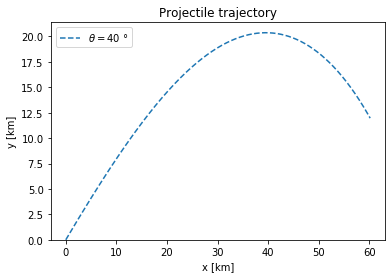

In [241]:
#Task 2a: xy-trajectory plot fot 0 < t < T
plt.figure()
plt.title("Projectile trajectory")
plt.xlabel(r"x [km]")
plt.ylabel(r"y [km]")
T = 100
angle = 40
h = 0.001
x_list2, y_list2 = projectile_motion_time2(h, angle, T)
plt.plot(x_list2/1000, y_list2/1000, '--', label=r'$\theta = $%.i $\degree$'%(angle))
plt.legend(loc='best')
plt.gca().set_ylim(bottom=0)
plt.show()

In [275]:
#Task 2b
def balloon_pass():
    # locates the y-coordinate of the point where horizontal distance of the projectile is 40km
    
    return np.float(y_list2[np.where(abs(x_list2 - 40000) == min(abs(x_list2 - 40000)))])


def determine_pass():
    # print out the point where the projectile passes the balloon
    
    if balloon_pass()/1000 > 20.0:
        print('The projectile passes ABOVE the weather balloon at ' + str(balloon_pass()/1000) + ' km.')
    else:
        print('The projectile passes BELOW the balloon at ' + str(balloon_pass()/1000) + ' km.')

        
determine_pass()

The projectile passes ABOVE the weather balloon at 20.356731445406016 km.


In [276]:
print('RK4: ymax = ' +str(round(max(y_list2)/1000,2)))

RK4: ymax = 20.36


In [277]:
x_list3, y_list3 = projectile_motion_time(h, angle, T)     # calculate trajectory using Euler's method

print('Euler: ymax = ' + str(round(max(y_list3)/1000,2)))    

Euler: ymax = 20.36


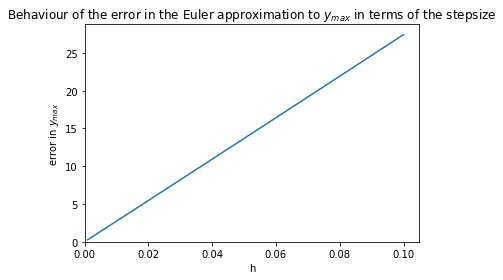

In [301]:
def error_demo():
    
    error_vals = []                    # empty list for error values

    h = np.linspace(1e-3,0.1,100)      # range of stepsizes to be used
    
    for i in range(len(h)):
        x_euler, y_euler = projectile_motion_time(h[i], angle, T)  # trajectory produced with Euler's method 
        x_rk4, y_rk4 = projectile_motion_time2(h[i], angle, T)     # trajectory produced with RK4
        error = abs(max(y_rk4) - max(y_euler))                     # calculates the difference between methods
        error_vals.append(error)

    plt.plot(h, error_vals)
    plt.xlabel('h')
    plt.ylim(0)
    plt.xlim(0)
    plt.ylabel(r'error in $y_{max}$')
    plt.title(r'Behaviour of the error in the Euler approximation to $y_{max}$ in terms of the stepsize')
    plt.show()   
    
error_demo()

We observe that error increases linearly with stepsize. Hence, Euler's method deviates increasingly from the Runge-Kutta method used above, producing a proportionately larger error in the approximation to $y_{max}$ with increasing stepsize. 